In [1]:
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
df = pd.read_csv("data1.csv")

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

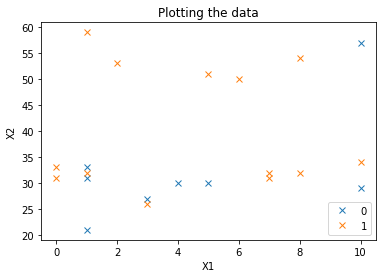

In [3]:
groups = df.groupby("Class")

for name, group in groups:
    plt.plot(group["Number of times pregnant"], group[" Age"], marker="x", linestyle="", label=name)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Plotting the data')
plt.legend()